<a href="https://colab.research.google.com/github/rabastos44/Bootcamp-Data-Science-Alura/blob/master/Modulo3/hipoteses.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
url = 'https://raw.githubusercontent.com/allanspadini/linear_estatistica/main/winequality-red.csv'

In [ ]:
import pandas as pd

In [ ]:
vinho = pd.read_csv(url, sep=';')

In [ ]:
vinho.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## Teste de normalidade

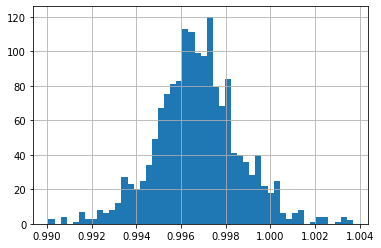

In [ ]:
vinho['density'].hist(bins=50)

In [ ]:
from scipy.stats import normaltest

O normaltest testa a hipótese nula $H_0$ de que a amostra é proveniente de uma distribuição normal. 

### Significância ($\alpha$)

In [ ]:
significancia = 0.05

### Rejeitamos $H_0$ se o valor $p \leq 0,05$ e aceitamos a hipótese alternativa $H_1$

In [ ]:
stat_test,p_valor= normaltest(vinho['density'])

In [ ]:
stat_test

30.707749940958617

In [ ]:
p_valor <= significancia

True

In [ ]:
import numpy as np

In [ ]:
media, escala = 0, 0.1

In [ ]:
dist_normal = np.random.normal(media, escala,1000)

In [ ]:
normaltest(dist_normal)

NormaltestResult(statistic=1.2040726146679055, pvalue=0.5476952239993289)

## Testes paramétricos

### Teste Bicaudal

Este teste é muito utilizado em **testes de qualidade**. Outro exemplo é a avaliação de peças que devem ter um encaixe perfeito (porcas e parafusos, chaves e fechaduras).

### <font color='red'>Problema</font>

Nossa produtora de vinhos produz garrafas de 500 ml. Seu processo de produção é quase todo automatizado e as garrafas são preenchidas por uma máquina que às vezes apresenta um certo desajuste, levando a erros no preenchimento das mesmas para mais ou menos conteúdo. Quando o volume médio cai abaixo de 500 ml, a empresa se preocupa em perder vendas e ter problemas com os orgãos fiscalizadores. Quando o volume passa de 500 ml, a empresa começa a se preocupar com prejuízos no processo de produção.

O setor de controle de qualidade da empresa extrai, periodicamente, amostras de 50 garrafas para monitorar o processo de produção. Para cada amostra, é realizado um teste de hipóteses para avaliar se o maquinário se desajustou. A equipe de controle de qualidade assume um nível de significância de 5%.

Suponha agora que uma amostra de 50 embalagens foi selecionada e que a média amostral observada foi de 503,24 ml. Esse valor de média amostral é suficientemente maior que 500 ml para nos fazer rejeitar a hipótese de que a média do processo é de 500 ml ao nível de significância de 5%?

![Teste Bicaudal](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img005.png)

In [ ]:
amostra = [509, 505, 495, 510, 496, 509, 497, 502, 503, 505, 
           501, 505, 510, 505, 504, 497, 506, 506, 508, 505, 
           497, 504, 500, 498, 506, 496, 508, 497, 503, 501, 
           503, 506, 499, 498, 509, 507, 503, 499, 509, 495, 
           502, 505, 504, 509, 508, 501, 505, 497, 508, 507]

In [ ]:
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra.head()

,Amostra
0,509
1,505
2,495
3,510
4,496


In [ ]:
media_amostra = amostra.mean()[0]
media_amostra

503.24

In [ ]:
desvio_padrao_amostra = amostra.std()[0]
desvio_padrao_amostra

4.483803050527347

In [ ]:
media = 500
significancia = 0.05
confianca = 1 - significancia
n = 50

### **Passo 1** - formulação das hipóteses $H_0$ e $H_1$

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu = 500$

### $H_1: \mu \neq 500$

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### O tamanho da amostra é maior que 30?
#### Resp.: Sim

### O desvio padrão populacional é conhecido?
#### Resp.: Não

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [ ]:
from scipy.stats import norm

In [ ]:
probabilidade = (0.5 + (confianca / 2))
probabilidade

0.975

### Obtendo $z_{\alpha/2}$

In [ ]:
z_alpha_2 = norm.ppf(probabilidade)
z_alpha_2

1.959963984540054

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img006.png)

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$z = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [ ]:
z = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
z

5.109559775991877

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img007.png)

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $z \leq -z_{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$

In [ ]:
z <= -z_alpha_2

False

In [ ]:
z >= z_alpha_2

True

### <font color='green'>Conclusão: Como a média amostral $\bar{x}$ é significativamente maior que 500 ml, rejeitamos $H_0$. Neste caso, devem ser tomadas providências para ajustar o maquinário que preenche as embalagens.</font>

### <font color='red'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
p_valor = 2 * (1 - norm.cdf(z))
p_valor

3.2291031715203644e-07

In [ ]:
p_valor = 2 * (norm.sf(z))
p_valor

3.229103172445718e-07

In [ ]:
p_valor <= significancia

True

### Ztest

In [ ]:
from statsmodels.stats.weightstats import ztest

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
ztest(x1 = amostra, value = media)

(array([5.10955978]), array([3.22910317e-07]))

### Teste unicaudal

## <font color='red'>Problema</font>

Nossa fábrica de vinho agora está produzindo mii garrafas de 350 ml de seu principal produto que contém, no máximo, 37 gramas de açúcar. Esta alegação nos leva a entender que a quantidade média de açúcar em uma garrafa deve ser igual ou menor que 37 g.

Um consumidor desconfiado e com conhecimentos em inferência estatística resolve testar a alegação do fabricante e seleciona, aleatóriamente, em um conjunto de estabelecimentos distintos, uma amostra de 25 garrafas. Utilizando o equipamento correto o consumidor obteve as quantidades de açúcar em todas as 25 amostras.

Assumindo que essa população se distribua aproximadamente como uma normal e considerando um nível de significância de 5%, é possível aceitar como válida a alegação do fabricante?

### Construindo tabela $t$ de Student

In [ ]:
import pandas as pd
from scipy.stats import t as t_student

tabela_t_student = pd.DataFrame(
    [], 
    index=[i for i in range(1, 31)],
    columns = [i / 100 for i in range(10, 0, -1)]
)

for index in tabela_t_student.index:
    for column in tabela_t_student.columns:
        tabela_t_student.loc[index, column] = t_student.ppf(1 - float(column) / 2, index)

index=[('Graus de Liberdade (n - 1)', i) for i in range(1, 31)]
tabela_t_student.index = pd.MultiIndex.from_tuples(index)

columns = [("{0:0.3f}".format(i / 100), "{0:0.3f}".format((i / 100) / 2)) for i in range(10, 0, -1)]
tabela_t_student.columns = pd.MultiIndex.from_tuples(columns)

tabela_t_student.rename_axis(['Bicaudal', 'Unicaudal'], axis=1, inplace = True)

tabela_t_student

Bicaudal                         0.100    0.090  ...    0.020    0.010
Unicaudal                        0.050    0.045  ...    0.010    0.005
Graus de Liberdade (n - 1) 1   6.31375  7.02637  ...  31.8205  63.6567
                           2   2.91999  3.10398  ...  6.96456  9.92484
                           3   2.35336  2.47081  ...   4.5407  5.84091
                           4   2.13185   2.2261  ...  3.74695  4.60409
                           5   2.01505  2.09784  ...  3.36493  4.03214
                           6   1.94318   2.0192  ...  3.14267  3.70743
                           7   1.89458  1.96615  ...  2.99795  3.49948
                           8   1.85955  1.92799  ...  2.89646  3.35539
                           9   1.83311  1.89922  ...  2.82144  3.24984
                           10  1.81246  1.87677  ...  2.76377  3.16927
                           11  1.79588  1.85877  ...  2.71808  3.10581
                           12  1.78229  1.84402  ...    2.681  3.05454
                           13  1.77093   1.8317  ...  2.65031  3.01228
                           14  1.76131  1.82127  ...  2.62449  2.97684
                           15  1.75305  1.81232  ...  2.60248  2.94671
                           16  1.74588  1.80455  ...  2.58349  2.92078
                           17  1.73961  1.79776  ...  2.56693  2.89823
                           18  1.73406  1.79175  ...  2.55238  2.87844
                           19  1.72913  1.78642  ...  2.53948  2.86093
                           20  1.72472  1.78164  ...  2.52798  2.84534
                           21  1.72074  1.77734  ...  2.51765  2.83136
                           22  1.71714  1.77345  ...  2.50832  2.81876
                           23  1.71387  1.76991  ...  2.49987  2.80734
                           24  1.71088  1.76667  ...  2.49216  2.79694
                           25  1.70814  1.76371  ...  2.48511  2.78744
                           26  1.70562  1.76098  ...  2.47863  2.77871
                           27  1.70329  1.75847  ...  2.47266  2.77068
                           28  1.70113  1.75613  ...  2.46714  2.76326
                           29  1.69913  1.75397  ...  2.46202  2.75639
                           30  1.69726  1.75195  ...  2.45726     2.75

[30 rows x 10 columns]

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img004.png' width='250px'>

As células da tabela acima são valores de $t$ para uma área ou probabilidade na cauda superior da distribuição $t$.

Os **testes unicaudais** verificam as variáveis em relação a um piso ou a um teto e avaliam os valores máximos ou mínimos esperados para os parâmetros em estudo e a chance de as estatísticas amostrais serem inferiores ou superiores a dado limite.

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img008.png' width='700px'>

### Dados do problema

In [ ]:
amostra = [37.27, 36.42, 34.84, 34.60, 37.49, 
           36.53, 35.49, 36.90, 34.52, 37.30, 
           34.99, 36.55, 36.29, 36.06, 37.42, 
           34.47, 36.70, 35.86, 36.80, 36.92, 
           37.04, 36.39, 37.32, 36.64, 35.45]

In [ ]:
amostra = pd.DataFrame(amostra, columns=['Amostra'])
amostra

,Amostra
0,37.27
1,36.42
2,34.84
3,34.60
4,37.49
5,36.53
6,35.49
7,36.90
8,34.52
9,37.30


In [ ]:
media_amostra = amostra.mean()

In [ ]:
desvio_padrao_amostra = amostra.std()

In [ ]:
media = 37
significancia = 0.05
confianca = 1 - significancia
n = 25
graus_de_liberdade = n - 1

#### <font color='red'>Lembre-se, a hipótese nula sempre contém a alegação de igualdade</font>

### $H_0: \mu \leq 37$

### $H_1: \mu > 37$

### **Passo 2** - escolha da distribuição amostral adequada
<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img003.png' width=70%>

### **Passo 3** - fixação da significância do teste ($\alpha$)

In [ ]:
from scipy.stats import t as t_student

In [ ]:
tabela_t_student[22:25]

Bicaudal                         0.100    0.090  ...    0.020    0.010
Unicaudal                        0.050    0.045  ...    0.010    0.005
Graus de Liberdade (n - 1) 23  1.71387  1.76991  ...  2.49987  2.80734
                           24  1.71088  1.76667  ...  2.49216  2.79694
                           25  1.70814  1.76371  ...  2.48511  2.78744

[3 rows x 10 columns]

### Obtendo $t_{\alpha}$

In [ ]:
t_alpha = t_student.ppf(confianca, graus_de_liberdade)
t_alpha

1.7108820799094275

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img009.png)

### **Passo 4** - cálculo da estatística-teste e verificação desse valor com as áreas de aceitação e rejeição do teste

# $$t = \frac{\bar{x} - \mu_0}{\frac{s}{\sqrt{n}}}$$

In [ ]:
t = (media_amostra - media) / (desvio_padrao_amostra / np.sqrt(n))
t

Amostra   -3.876893
dtype: float64

![Estatística-Teste](https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img010.png)

### **Passo 5** - Aceitação ou rejeição da hipótese nula

<img src='https://caelum-online-public.s3.amazonaws.com/1229-estatistica-parte3/01/img013.png' width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se $t \geq t_{\alpha}$

In [ ]:
t >= t_alpha

Amostra    False
dtype: bool

### <font color='green'>Conclusão: Com um nível de confiança de 95% não podemos rejeitar $H_0$, ou seja, a alegação do fabricante é verdadeira.</font>

### <font color='red'>Critério do valor $p$</font>

> ### Teste Unicaudal Superior
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [ ]:
t

Amostra   -3.876893
dtype: float64

In [ ]:
p_valor = t_student.sf(t, df = 24)
p_valor

array([0.99964062])

In [ ]:
p_valor <= significancia

array([False])

In [ ]:
from statsmodels.stats.weightstats import DescrStatsW

In [ ]:
test = DescrStatsW(amostra)

In [ ]:
t, p_valor, df = test.ttest_mean(value = media, alternative = 'larger')
print(t[0])
print(p_valor[0])
print(df)

-3.8768931199520447
0.9996406170303819
24.0


In [ ]:
p_valor[0] <= significancia

False